Missing TMAX values: 376
Date range: 1893-02-01 00:00:00 to 1898-12-31 00:00:00


/tmp/ipykernel_29286/1350903232.py:13: DtypeWarning: Columns (27,29,31,33,35,37,39,41,43) have mixed types. Specify dtype option on import or set low_memory=False.
  steamboat_climate_df = pd.read_csv(SteamboatClimateURL,


<Axes: title={'center': 'Steamboat Yearly Mean Maximum Temperature'}, xlabel='Year', ylabel='Temp (°C)'>

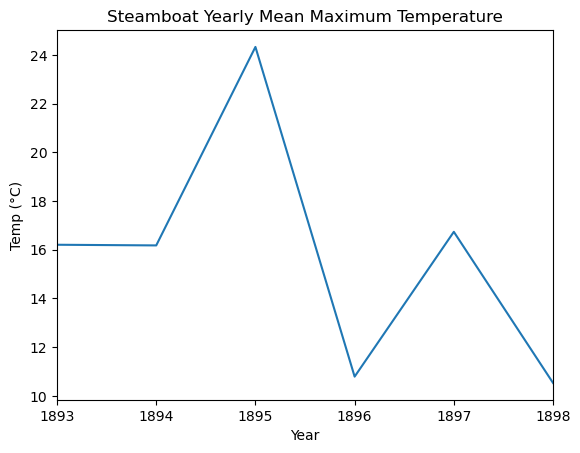

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Google Drive file ID (extracted from the link) updated file with dates fixed
# file_id = '1Yiw4iCVGed2kq2Do0osaCU92FlJCWxBN'
# https://drive.google.com/file/d/1tXD2YGxhEwXQ83UDxvad_co0fUc4Dn9m/view?usp=sharing
# file_id = '1tXD2YGxhEwXQ83UDxvad_co0fUc4Dn9m'

# Create a URL for direct download
SteamboatClimateURL = f'https://drive.google.com/uc?id={file_id}'

# Read the data from the CSV file
steamboat_climate_df = pd.read_csv(SteamboatClimateURL,
                                   index_col='DATE', 
                                   parse_dates=True, 
                                   na_values=['NaN'])

# Ensure that the index is properly converted to DatetimeIndex
steamboat_climate_df.index = pd.to_datetime(steamboat_climate_df.index, errors='coerce')

# Check for missing data in TMAX
print("Missing TMAX values:", steamboat_climate_df['TMAX'].isna().sum())

# Convert TMAX to numeric, coerce any errors to NaN (if not already NaN)
steamboat_climate_df['TMAX'] = pd.to_numeric(steamboat_climate_df['TMAX'], errors='coerce')

# Fill missing TMAX values with the mean of the column (or other appropriate strategy)
steamboat_climate_df['TMAX'] = steamboat_climate_df['TMAX'].fillna(steamboat_climate_df['TMAX'].mean())

# Check the date range of the data to ensure it continues past 1898
print("Date range:", steamboat_climate_df.index.min(), "to", steamboat_climate_df.index.max())

# If there are missing data points after 1898, fill them appropriately or drop the faulty rows

# Resample data to yearly frequency and calculate the mean for TMAX
steamboat_yearly_mean_df = steamboat_climate_df['TMAX'].resample('YS').mean()

# Plot the yearly mean of TMAX
#plt.figure(figsize=(10, 6))
#plt.plot(steamboat_yearly_mean_df.index, steamboat_yearly_mean_df, marker='o', linestyle='-', color='b')
#plt.title('Yearly Mean TMAX for Steamboat Springs', fontsize=14)
#plt.xlabel('Year', fontsize=12)
#plt.ylabel('TMAX (°C)', fontsize=12)
#plt.grid(True)
#plt.show()

steamboat_yearly_mean_df.plot(y='TMAX',
    title='Steamboat Yearly Mean Maximum Temperature', 
    xlabel='Year',
    ylabel='Temp (°C)',
      legend=False)
